# HW3 Finding anomalies in data

## 1. Загрузка библиотек и данных

In [1]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Настройка pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

In [2]:
# Загрузка датасета
df = pd.read_csv('creditcard.csv')

print(f'Размер датасета: {df.shape}')
print(f'Количество транзакций: {len(df):,}')
print(f'\nПервые строки:')
df.head()

Размер датасета: (284807, 31)
Количество транзакций: 284,807

Первые строки:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.62,0
1,0.0,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.69,0
2,1.0,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.66,0
3,1.0,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.50,0
4,2.0,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.99,0


In [3]:
# Информация о датасете
print('Информация о датасете')
df.info()

print('\nПроверка пропущенных значений')
print(df.isnull().sum().sum())

Информация о датасете
<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21 

## 2. Exploratory Data Analysis (EDA)

### 2.1 Описательная статистика

In [4]:
# Описательные статистика
print('Описательная статистика')
df.describe()

Описательная статистика


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,284807.0000,284807.0000
mean,94813.8596,1.1752e-15,3.3850e-16,-1.3795e-15,2.0949e-15,1.0219e-15,1.4945e-15,-5.6203e-16,1.1496e-16,-2.4142e-15,2.2386e-15,1.7244e-15,-1.2454e-15,8.2389e-16,1.2135e-15,4.8667e-15,1.4362e-15,-3.7682e-16,9.7079e-16,1.0362e-15,6.4187e-16,1.6286e-16,-3.5766e-16,2.6186e-16,4.4739e-15,5.1094e-16,1.6861e-15,-3.6614e-16,-1.2275e-16,88.3496,0.0017
std,47488.1460,1.9587e+00,1.6513e+00,1.5163e+00,1.4159e+00,1.3802e+00,1.3323e+00,1.2371e+00,1.1944e+00,1.0986e+00,1.0888e+00,1.0207e+00,9.9920e-01,9.9527e-01,9.5860e-01,9.1532e-01,8.7625e-01,8.4934e-01,8.3818e-01,8.1404e-01,7.7093e-01,7.3452e-01,7.2570e-01,6.2446e-01,6.0565e-01,5.2128e-01,4.8223e-01,4.0363e-01,3.3008e-01,250.1201,0.0415
min,0.0000,-5.6408e+01,-7.2716e+01,-4.8326e+01,-5.6832e+00,-1.1374e+02,-2.6161e+01,-4.3557e+01,-7.3217e+01,-1.3434e+01,-2.4588e+01,-4.7975e+00,-1.8684e+01,-5.7919e+00,-1.9214e+01,-4.4989e+00,-1.4130e+01,-2.5163e+01,-9.4987e+00,-7.2135e+00,-5.4498e+01,-3.4830e+01,-1.0933e+01,-4.4808e+01,-2.8366e+00,-1.0295e+01,-2.6046e+00,-2.2566e+01,-1.5430e+01,0.0000,0.0000
25%,54201.5000,-9.2037e-01,-5.9855e-01,-8.9036e-01,-8.4864e-01,-6.9160e-01,-7.6830e-01,-5.5408e-01,-2.0863e-01,-6.4310e-01,-5.3543e-01,-7.6249e-01,-4.0557e-01,-6.4854e-01,-4.2557e-01,-5.8288e-01,-4.6804e-01,-4.8375e-01,-4.9885e-01,-4.5630e-01,-2.1172e-01,-2.2839e-01,-5.4235e-01,-1.6185e-01,-3.5459e-01,-3.1715e-01,-3.2698e-01,-7.0840e-02,-5.2960e-02,5.6000,0.0000
50%,84692.0000,1.8109e-02,6.5486e-02,1.7985e-01,-1.9847e-02,-5.4336e-02,-2.7419e-01,4.0103e-02,2.2358e-02,-5.1429e-02,-9.2917e-02,-3.2757e-02,1.4003e-01,-1.3568e-02,5.0601e-02,4.8072e-02,6.6413e-02,-6.5676e-02,-3.6363e-03,3.7348e-03,-6.2481e-02,-2.9450e-02,6.7819e-03,-1.1193e-02,4.0976e-02,1.6594e-02,-5.2139e-02,1.3421e-03,1.1244e-02,22.0000,0.0000
75%,139320.5000,1.3156e+00,8.0372e-01,1.0272e+00,7.4334e-01,6.1193e-01,3.9856e-01,5.7044e-01,3.2735e-01,5.9714e-01,4.5392e-01,7.3959e-01,6.1824e-01,6.6250e-01,4.9315e-01,6.4882e-01,5.2330e-01,3.9967e-01,5.0081e-01,4.5895e-01,1.3304e-01,1.8638e-01,5.2855e-01,1.4764e-01,4.3953e-01,3.5072e-01,2.4095e-01,9.1045e-02,7.8280e-02,77.1650,0.0000
max,172792.0000,2.4549e+00,2.2058e+01,9.3826e+00,1.6875e+01,3.4802e+01,7.3302e+01,1.2059e+02,2.0007e+01,1.5595e+01,2.3745e+01,1.2019e+01,7.8484e+00,7.1269e+00,1.0527e+01,8.8777e+00,1.7315e+01,9.2535e+00,5.0411e+00,5.5920e+00,3.9421e+01,2.7203e+01,1.0503e+01,2.2528e+01,4.5845e+00,7.5196e+00,3.5173e+00,3.1612e+01,3.3848e+01,25691.1600,1.0000


In [5]:
# Распределение классов
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print('Распределение классов')
print(f'Normal transactions (Class 0): {class_counts[0]:,} ({class_percentages[0]:.3f}%)')
print(f'Fraudulent transactions (Class 1): {class_counts[1]:,} ({class_percentages[1]:.3f}%)')
print(f'\nDegree of imbalance: {class_counts[0] / class_counts[1]:.1f}:1')

Распределение классов
Normal transactions (Class 0): 284,315 (99.827%)
Fraudulent transactions (Class 1): 492 (0.173%)

Degree of imbalance: 577.9:1


### 2.2 Визуализация распределения классов

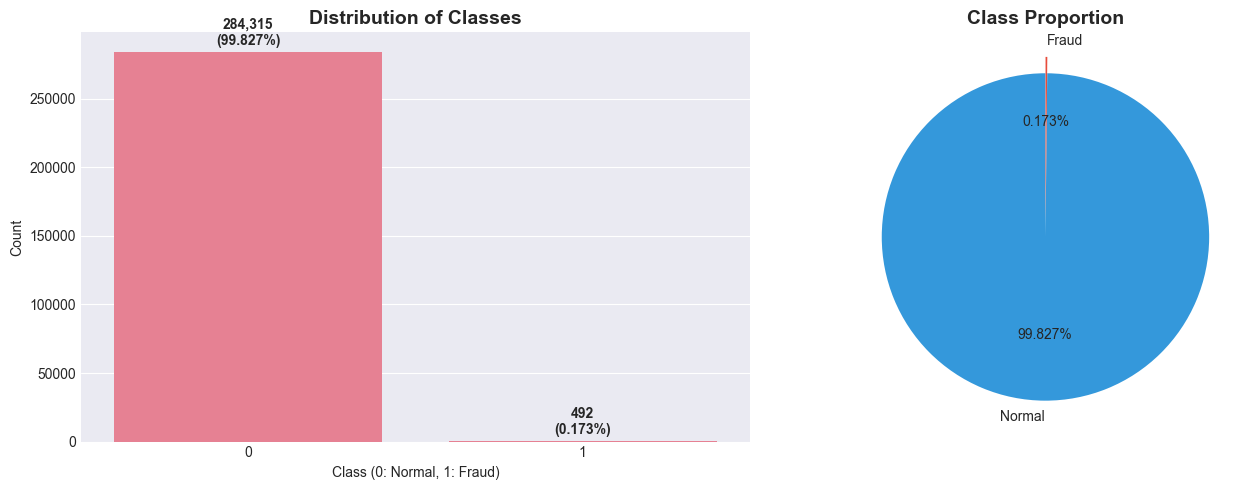

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Countplot
sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title('Distribution of Classes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Normal, 1: Fraud)')
axes[0].set_ylabel('Count')
for i, v in enumerate(class_counts):
    axes[0].text(i, v + 5000, f'{v:,}\n({class_percentages[i]:.3f}%)', 
                ha='center', fontweight='bold')

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.3f%%',
           colors=colors, startangle=90, explode=(0, 0.1))
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.3 Распределение признаков Time и Amount

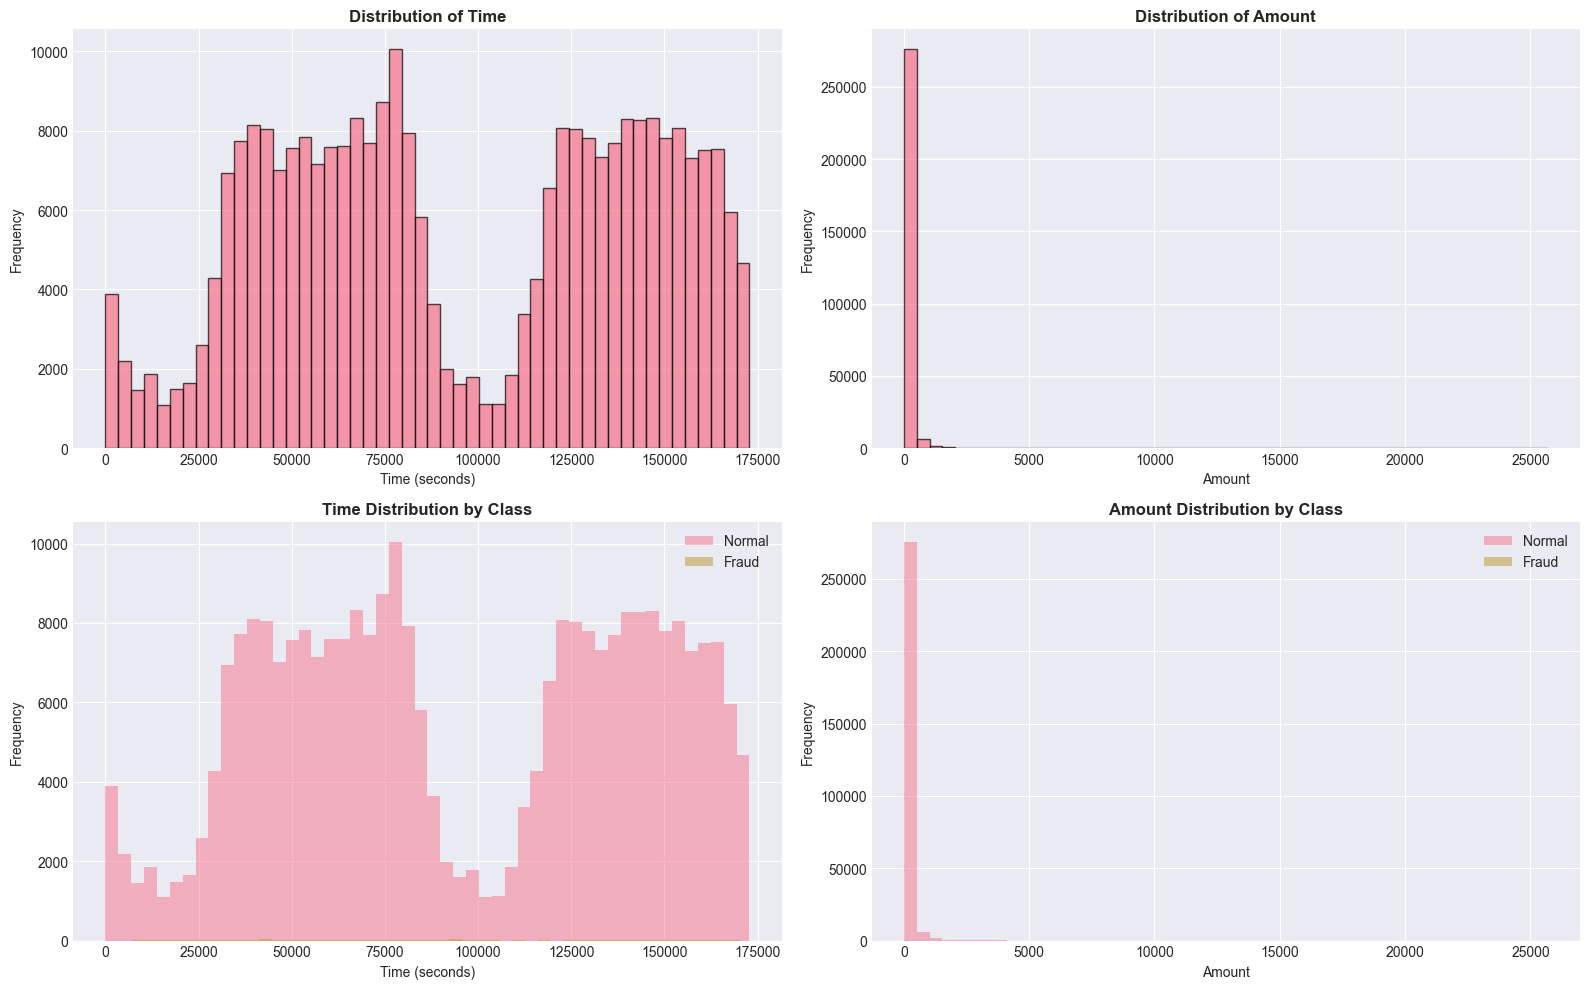

Amount statistics for Normal transactions:
count    284315.0000
mean         88.2910
std         250.1051
min           0.0000
25%           5.6500
50%          22.0000
75%          77.0500
max       25691.1600
Name: Amount, dtype: float64

Amount statistics for Fraudulent transactions:
count     492.0000
mean      122.2113
std       256.6833
min         0.0000
25%         1.0000
50%         9.2500
75%       105.8900
max      2125.8700
Name: Amount, dtype: float64


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time distribution
axes[0, 0].hist(df['Time'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Time', fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)')
axes[0, 0].set_ylabel('Frequency')

# Amount distribution
axes[0, 1].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Amount', fontweight='bold')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')

# Time by Class
df[df['Class'] == 0]['Time'].hist(bins=50, alpha=0.5, label='Normal', ax=axes[1, 0])
df[df['Class'] == 1]['Time'].hist(bins=50, alpha=0.5, label='Fraud', ax=axes[1, 0])
axes[1, 0].set_title('Time Distribution by Class', fontweight='bold')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Amount by Class
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.5, label='Normal', ax=axes[1, 1])
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.5, label='Fraud', ax=axes[1, 1])
axes[1, 1].set_title('Amount Distribution by Class', fontweight='bold')
axes[1, 1].set_xlabel('Amount')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f'Amount statistics for Normal transactions:')
print(df[df['Class'] == 0]['Amount'].describe())
print(f'\nAmount statistics for Fraudulent transactions:')
print(df[df['Class'] == 1]['Amount'].describe())

### 2.4 Анализ PCA-компонент (V1-V28)

In [8]:
# Выборка для визуализации
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0].sample(n=len(df_fraud), random_state=42)
df_sample = pd.concat([df_fraud, df_normal])

print(f'Sample size: {len(df_sample)} (balanced)')
print(f'Fraud: {len(df_fraud)}, Normal: {len(df_normal)}')

Sample size: 984 (balanced)
Fraud: 492, Normal: 492


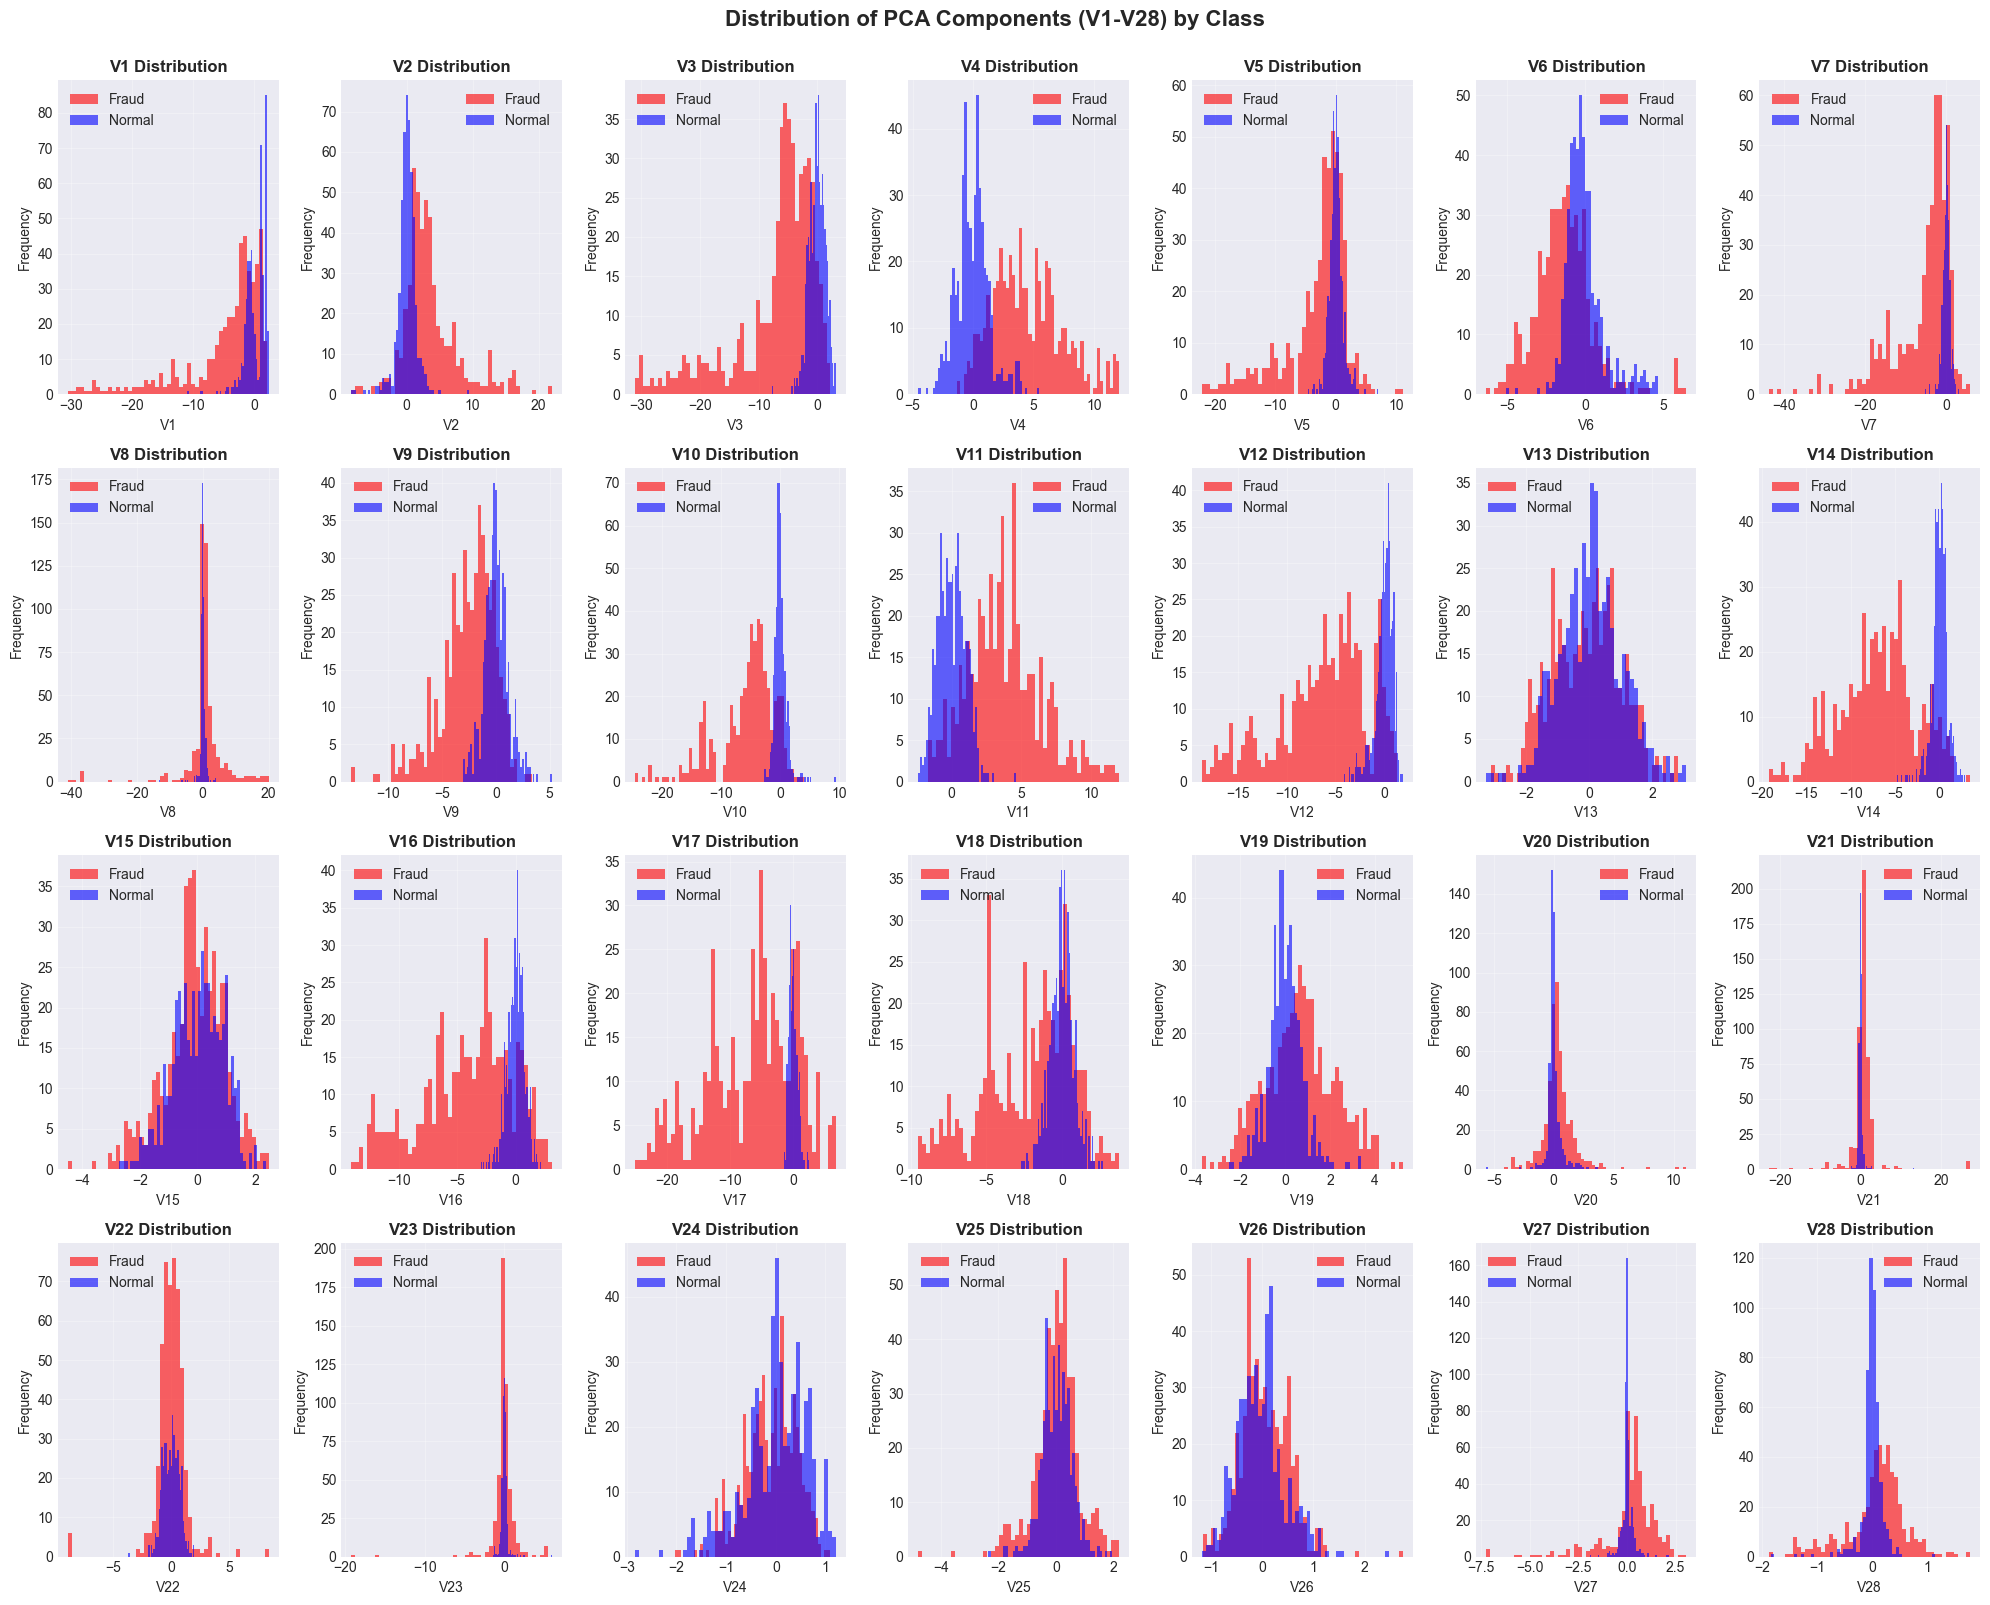

In [ ]:
# Гистограммы PCA компонент
v_features = [f'V{i}' for i in range(1, 29)]  # V1-V28

fig, axes = plt.subplots(4, 7, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(v_features):
    axes[idx].hist(df_fraud[col], bins=50, alpha=0.6, label='Fraud', color='red')
    axes[idx].hist(df_normal[col], bins=50, alpha=0.6, label='Normal', color='blue')
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribution of PCA Components (V1-V28) by Class', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

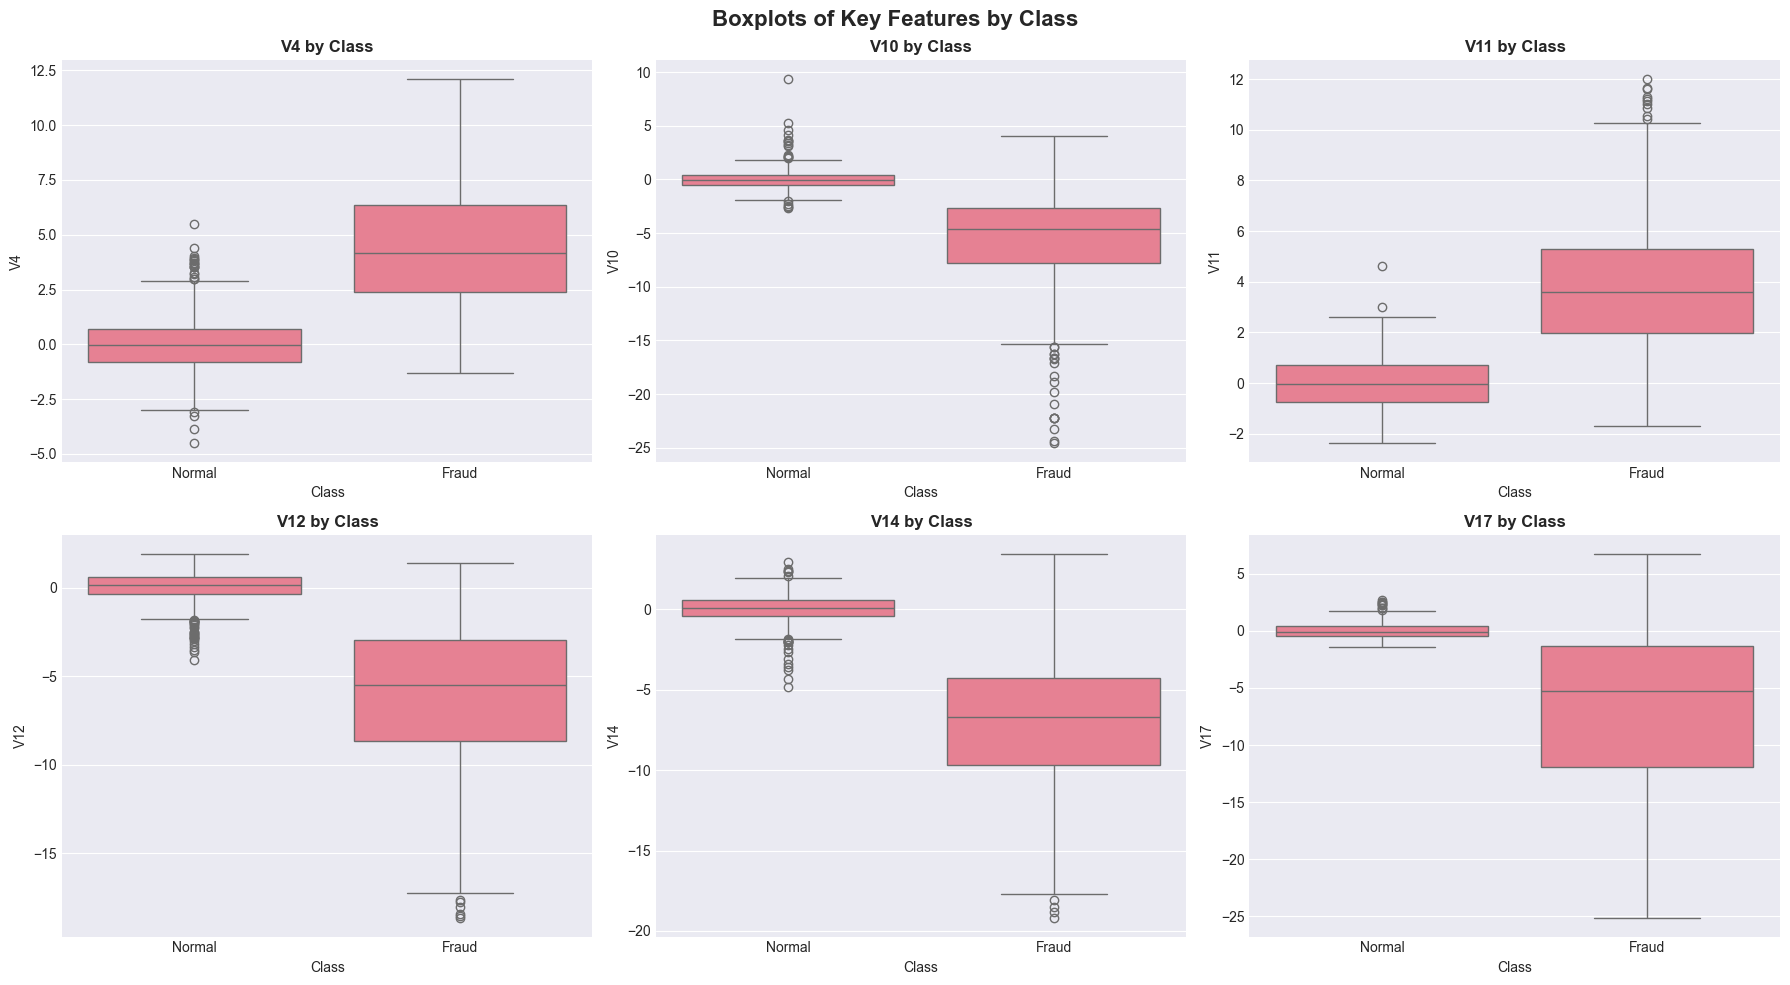

In [10]:
# Признаки с наибольшим различием между классами
important_features = ['V4', 'V10', 'V11', 'V12', 'V14', 'V17']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(important_features):
    sns.boxplot(x='Class', y=col, data=df_sample, ax=axes[idx])
    axes[idx].set_title(f'{col} by Class', fontweight='bold')
    axes[idx].set_xticklabels(['Normal', 'Fraud'])

plt.suptitle('Boxplots of Key Features by Class', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.5 Корреляционный анализ

In [11]:
# Корреляция с целевой переменной
correlation = df.corr()['Class'].sort_values(ascending=False)

print('Корреляция признаков с Class')
print('\nПоложительная корреляция (top 5):')
print(correlation.head(6))
print('\nОтрицательная корреляция (top 5):')
print(correlation.tail(5))

Корреляция признаков с Class

Положительная корреляция (top 5):
Class    1.0000
V11      0.1549
V4       0.1334
V2       0.0913
V21      0.0404
V19      0.0348
Name: Class, dtype: float64

Отрицательная корреляция (top 5):
V16   -0.1965
V10   -0.2169
V12   -0.2606
V14   -0.3025
V17   -0.3265
Name: Class, dtype: float64


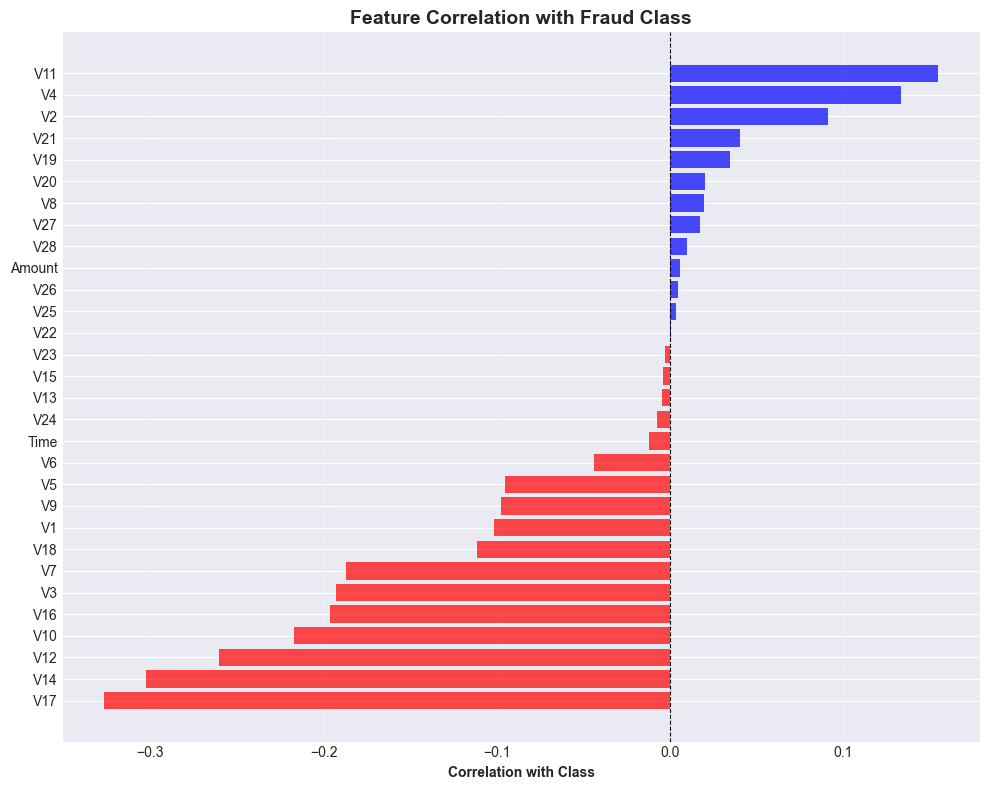

In [12]:
# Визуализация корреляции
fig, ax = plt.subplots(figsize=(10, 8))

correlation_sorted = correlation.drop('Class').sort_values()
colors = ['red' if x < 0 else 'blue' for x in correlation_sorted]

ax.barh(range(len(correlation_sorted)), correlation_sorted, color=colors, alpha=0.7)
ax.set_yticks(range(len(correlation_sorted)))
ax.set_yticklabels(correlation_sorted.index)
ax.set_xlabel('Correlation with Class', fontweight='bold')
ax.set_title('Feature Correlation with Fraud Class', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 3. Подготовка данных для моделирования

In [13]:
from sklearn.preprocessing import StandardScaler

# Создание копии датасета
df_model = df.copy()

# Масштабирование Time и Amount
scaler = StandardScaler()
df_model['scaled_amount'] = scaler.fit_transform(df_model['Amount'].values.reshape(-1, 1))
df_model['scaled_time'] = scaler.fit_transform(df_model['Time'].values.reshape(-1, 1))

# Удаление оригинальных Time и Amount
df_model = df_model.drop(['Time', 'Amount'], axis=1)

print('Датасет после масштабирования:')
print(f'Shape: {df_model.shape}')
df_model.head()

Датасет после масштабирования:
Shape: (284807, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,0,0.2450,-1.9966
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,0,-0.3425,-1.9966
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,0,1.1607,-1.9966
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,0,0.1405,-1.9966
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,0,-0.0734,-1.9965


In [14]:
# Определение contamination rate (экспертная оценка загрязненности)
contamination = df['Class'].sum() / len(df)

print(f'Contamination Rate')
print(f'Contamination: {contamination:.6f} ({contamination*100:.4f}%)')
print(f'\nЭто значение будет использоваться для настройки параметров моделей обнаружения аномалий.')

Contamination Rate
Contamination: 0.001727 (0.1727%)

Это значение будет использоваться для настройки параметров моделей обнаружения аномалий.


In [15]:
# Подготовка X и y
X = df_model.drop('Class', axis=1).values
y = df_model['Class'].values

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Number of features: {X.shape[1]}')

Features shape: (284807, 30)
Target shape: (284807,)
Number of features: 30


## 4. Построение моделей обнаружения аномалий (PyOD)

In [21]:
# Импорт моделей PyOD
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.pca import PCA as PCA_Outlier
from pyod.models.suod import SUOD

import time

In [38]:
# Инициализация моделей
models = {
    'IForest': IForest(contamination=contamination, random_state=42, n_estimators=100),
    'KNN': KNN(contamination=contamination, n_neighbors=5),
    'LOF': LOF(contamination=contamination, n_neighbors=20),
    'OCSVM': OCSVM(contamination=contamination, kernel='rbf'),
    'CBLOF': CBLOF(contamination=contamination, random_state=42),
    'HBOS': HBOS(contamination=contamination),
    'ECOD': ECOD(contamination=contamination),
    'COPOD': COPOD(contamination=contamination),
    'PCA': PCA_Outlier(contamination=contamination, random_state=42)
}

print(f'Инициализировано {len(models)} моделей:')
for name in models.keys():
    print(f'  - {name}')

Инициализировано 9 моделей:
  - IForest
  - KNN
  - LOF
  - OCSVM
  - CBLOF
  - HBOS
  - ECOD
  - COPOD
  - PCA


In [40]:
# Обучение моделей и получение предсказаний
from sklearn.model_selection import train_test_split

fast_model_names = ['IForest', 'HBOS', 'ECOD', 'COPOD', 'PCA']

predictions = {}
scores = {}
training_times = {}

print('Обучение моделей\n')

# подвыборка для медленных
X_sub, _ = train_test_split(X, train_size=0.2, random_state=42)

for name, model in models.items():
    print(f'Training {name}...', end=' ')
    start_time = time.time()

    if name in fast_model_names:
        # быстрые модели — учим на всём X
        model.fit(X)
    else:
        # медленные — учим только на 20%
        model.fit(X_sub)

    # предсказываем на всём X
    y_pred = model.predict(X)              # 0 - normal, 1 - outlier
    y_scores = model.decision_scores_      # скоры; в PyOD после predict обновляются

    predictions[name] = y_pred
    scores[name] = y_scores
    training_times[name] = time.time() - start_time

    print(f'Completed in {training_times[name]:.2f} seconds')


Обучение моделей

Training IForest... Completed in 2.91 seconds
Training KNN... Completed in 398.42 seconds
Training LOF... Completed in 7.59 seconds
Training OCSVM... Completed in 538.86 seconds
Training CBLOF... Completed in 0.21 seconds
Training HBOS... Completed in 0.37 seconds
Training ECOD... Completed in 4.22 seconds
Training COPOD... Completed in 4.35 seconds
Training PCA... Completed in 0.36 seconds


In [43]:
# пересчитаем скоры на полном X, так как для медленных моделей они были получены на подвыборке
# предполагаем, что models уже обучены 
scores = {}

for name, model in models.items():
    print(f'Recomputing scores for {name}...', end=' ')
    # скоры на полном X
    scores[name] = model.decision_function(X)
    print('done')

Recomputing scores for IForest... done
Recomputing scores for KNN... done
Recomputing scores for LOF... done
Recomputing scores for OCSVM... done
Recomputing scores for CBLOF... done
Recomputing scores for HBOS... done
Recomputing scores for ECOD... done
Recomputing scores for COPOD... done
Recomputing scores for PCA... done


## 5. Оценка качества моделей

In [44]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, precision_score, 
                            recall_score, f1_score, accuracy_score)

### 5.1 Детальный отчет по каждой модели

In [45]:
# Оценка каждой модели
results = {}

for name, y_pred in predictions.items():
    print(f'\n{'='*70}')
    print(f'Model: {name}')
    print(f'Training time: {training_times[name]:.2f} seconds')
    print(f'{'='*70}')
    
    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y, y_pred, target_names=['Normal', 'Fraud'], digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    print(f'Confusion Matrix:')
    print(f'  TN: {cm[0,0]:>7,}  |  FP: {cm[0,1]:>6,}')
    print(f'  FN: {cm[1,0]:>7,}  |  TP: {cm[1,1]:>6,}')
    
    # Метрики
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y, scores[name])
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time': training_times[name]
    }
    
    print(f'\nKey Metrics:')
    print(f'  Accuracy:  {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall:    {recall:.4f}')
    print(f'  F1-Score:  {f1:.4f}')
    print(f'  ROC-AUC:   {roc_auc:.4f}')


Model: IForest
Training time: 2.91 seconds

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9987    0.9987    0.9987    284315
       Fraud     0.2764    0.2764    0.2764       492

    accuracy                         0.9975    284807
   macro avg     0.6376    0.6376    0.6376    284807
weighted avg     0.9975    0.9975    0.9975    284807

Confusion Matrix:
  TN: 283,959  |  FP:    356
  FN:     356  |  TP:    136

Key Metrics:
  Accuracy:  0.9975
  Precision: 0.2764
  Recall:    0.2764
  F1-Score:  0.2764
  ROC-AUC:   0.9480

Model: KNN
Training time: 398.42 seconds

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9985    0.9987    0.9986    284315
       Fraud     0.1630    0.1504    0.1564       492

    accuracy                         0.9972    284807
   macro avg     0.5808    0.5745    0.5775    284807
weighted avg     0.9971    0.9972    0.9971    284807

Confusion Matrix:
  TN

### 5.2 Сравнительная таблица результатов

F1 показывает, насколько модель одновременно **точно** и **полно** находит мошенничество (класс 1).

Формально:

- Precision = TP / (TP + FP) — доля найденных «Fraud», которые реально Fraud.
- Recall = TP / (TP + FN) — доля всех реальных Fraud, которые модель поймала.
- F1 — гармоническое среднее precision и recall:  
$$
F1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

In [47]:
# Сравнительная таблица
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score', ascending=False)

print('\n' + '='*90)
print('SUMMARY: Model Performance Comparison')
print('='*90)
print(results_df.to_string())

# Определение лучшей модели
best_model = results_df['F1-Score'].idxmax()
print(f'\n Best model by F1-Score: {best_model} (F1: {results_df.loc[best_model, "F1-Score"]:.4f})')

results_df


SUMMARY: Model Performance Comparison
         Accuracy  Precision  Recall  F1-Score  ROC-AUC  Training Time
HBOS       0.9978     0.3537  0.3537    0.3537   0.9515         0.3672
COPOD      0.9977     0.3435  0.3435    0.3435   0.9477         4.3544
ECOD       0.9976     0.3150  0.3150    0.3150   0.9494         4.2247
IForest    0.9975     0.2764  0.2764    0.2764   0.9480         2.9073
CBLOF      0.9974     0.2446  0.2297    0.2369   0.9527         0.2116
PCA        0.9973     0.2317  0.2317    0.2317   0.9523         0.3619
OCSVM      0.9963     0.1462  0.2317    0.1792   0.9529       538.8602
KNN        0.9972     0.1630  0.1504    0.1564   0.9586       398.4216
LOF        0.9967     0.0209  0.0203    0.0206   0.5036         7.5897

 Best model by F1-Score: HBOS (F1: 0.3537)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time
HBOS,0.9978,0.3537,0.3537,0.3537,0.9515,0.3672
COPOD,0.9977,0.3435,0.3435,0.3435,0.9477,4.3544
ECOD,0.9976,0.3150,0.3150,0.3150,0.9494,4.2247
IForest,0.9975,0.2764,0.2764,0.2764,0.9480,2.9073
CBLOF,0.9974,0.2446,0.2297,0.2369,0.9527,0.2116
PCA,0.9973,0.2317,0.2317,0.2317,0.9523,0.3619
OCSVM,0.9963,0.1462,0.2317,0.1792,0.9529,538.8602
KNN,0.9972,0.1630,0.1504,0.1564,0.9586,398.4216
LOF,0.9967,0.0209,0.0203,0.0206,0.5036,7.5897


### 5.3 Визуализация метрик

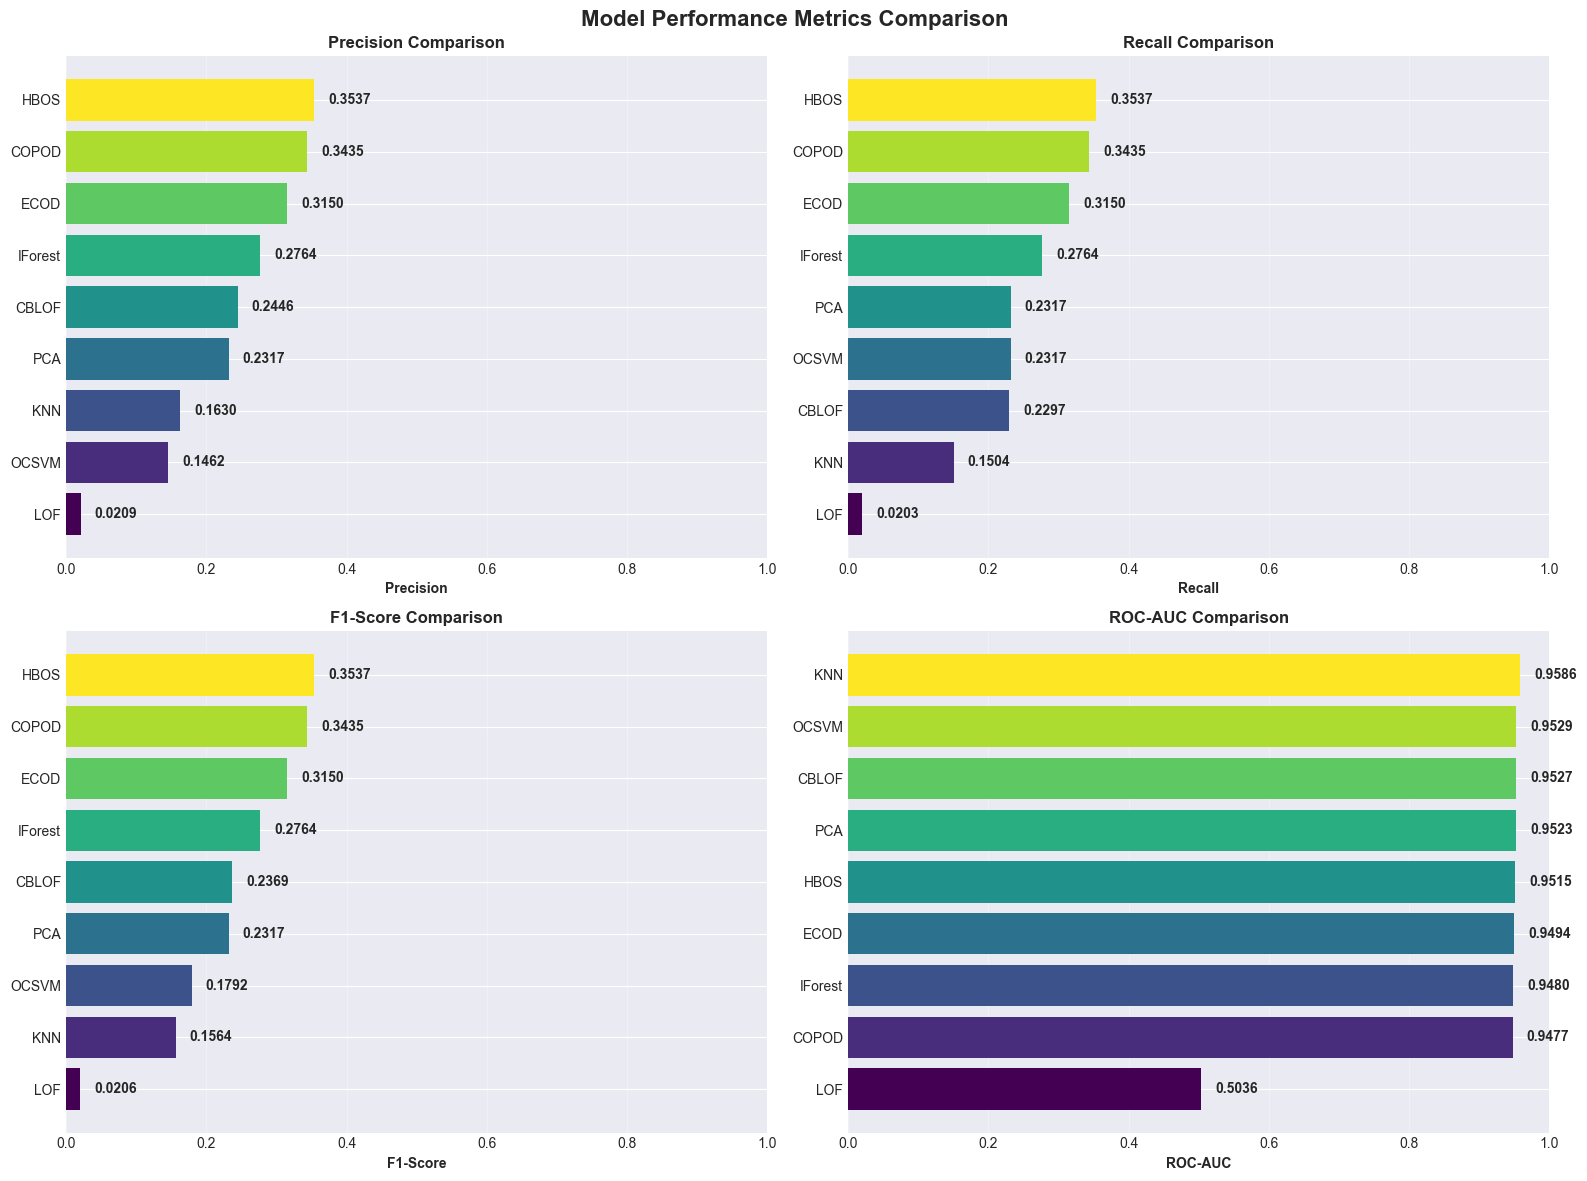

In [48]:
# Визуализация метрик
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    data = results_df[metric].sort_values(ascending=True)
    
    bars = ax.barh(range(len(data)), data, color=colors)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(alpha=0.3, axis='x')
    
    # Добавление значений на графики
    for i, (name, value) in enumerate(data.items()):
        ax.text(value + 0.02, i, f'{value:.4f}', va='center', fontweight='bold')

plt.suptitle('Model Performance Metrics Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.4 Confusion Matrix для всех моделей

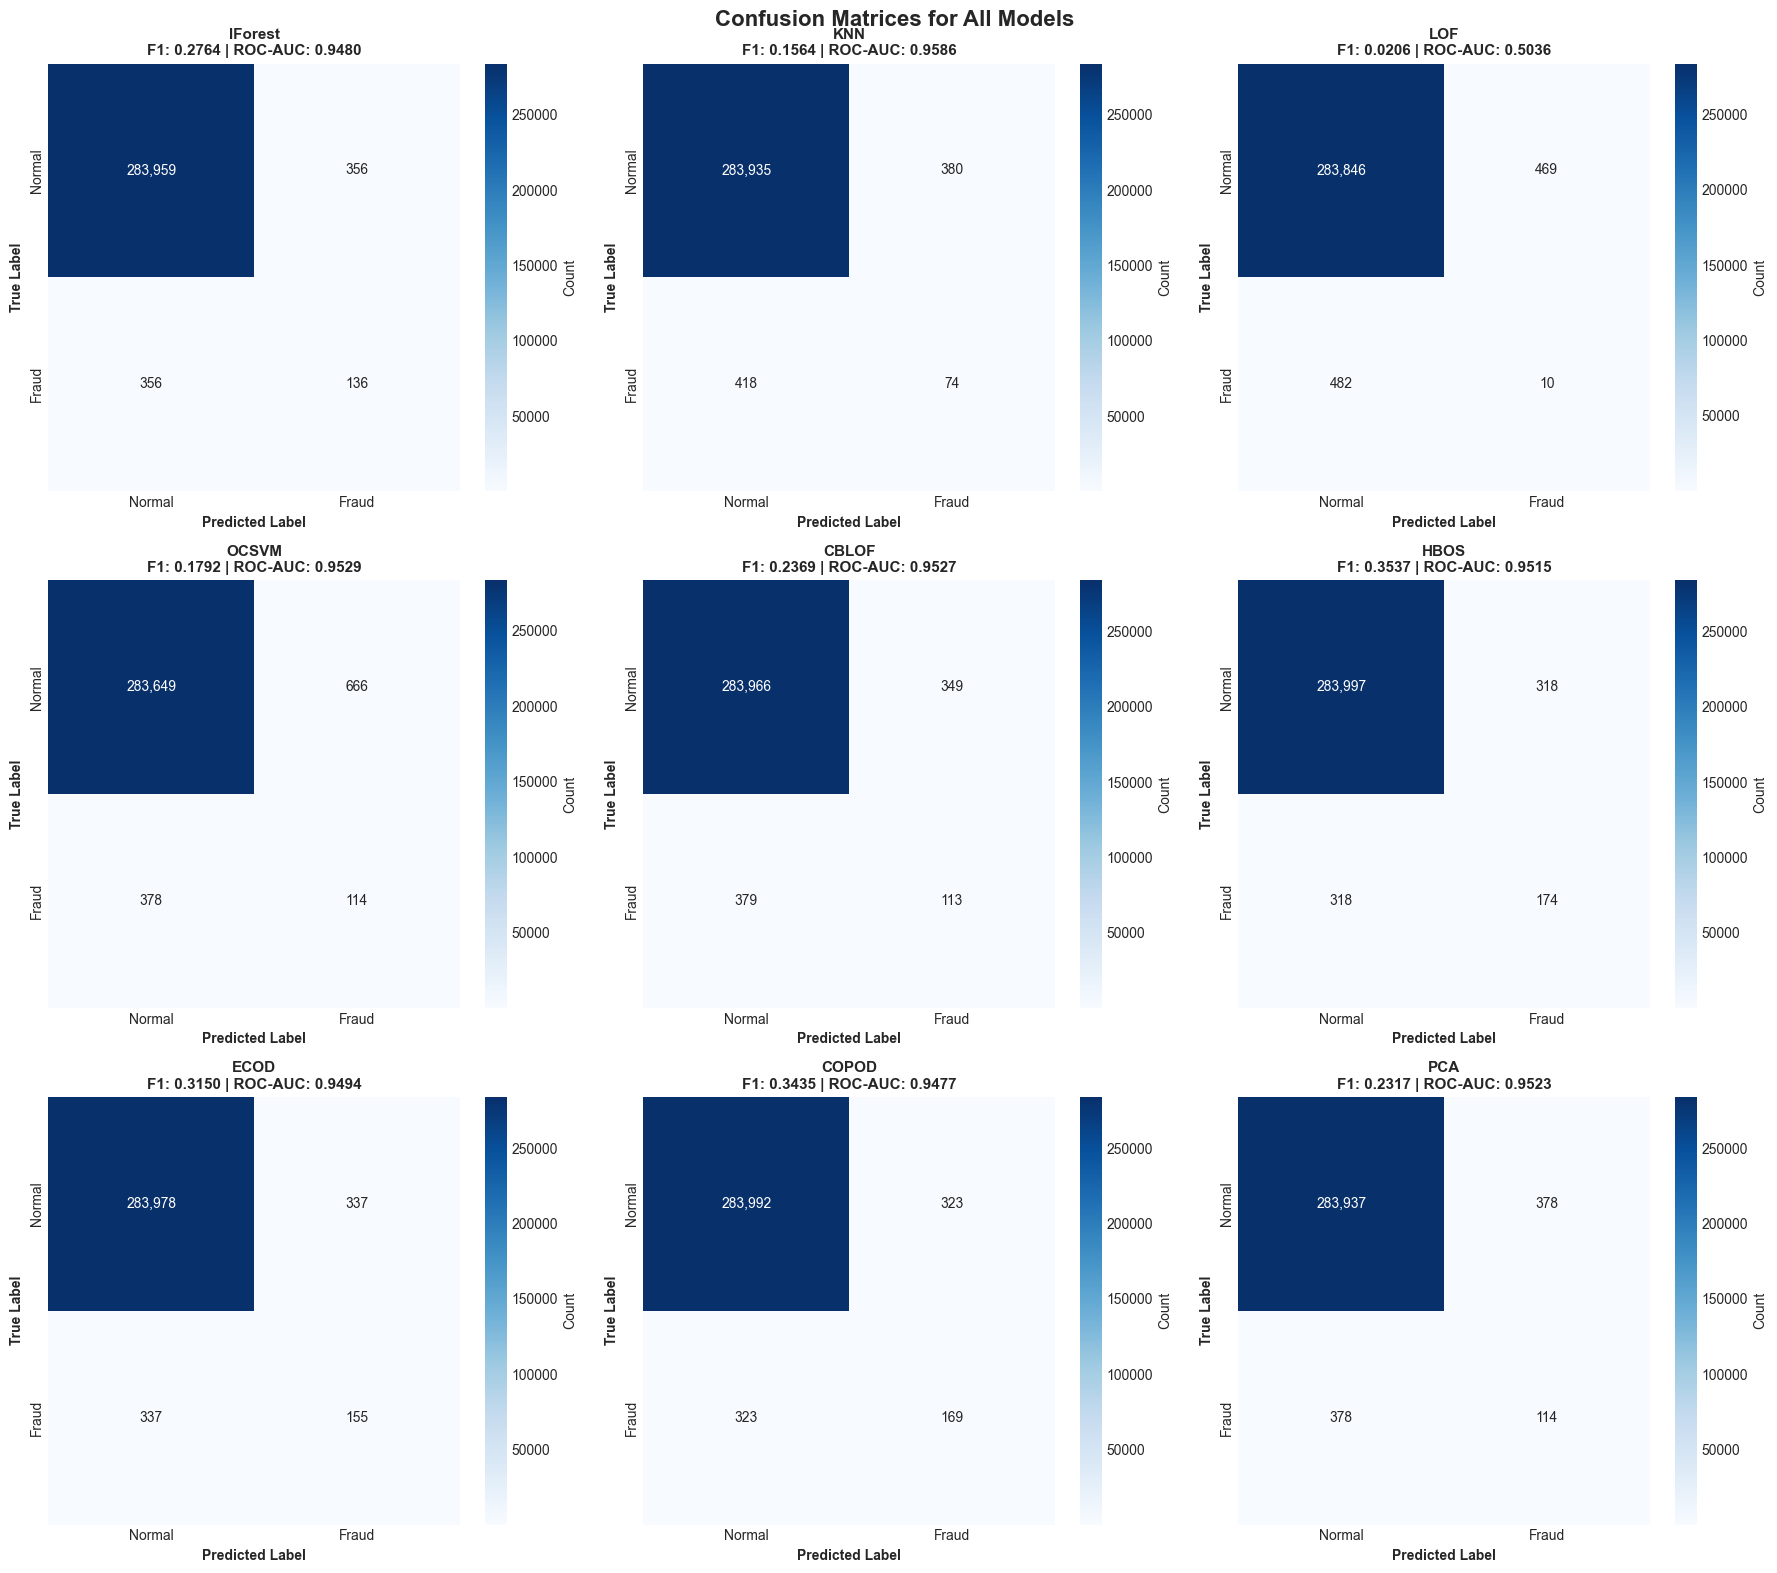

In [49]:
# Визуализация Confusion Matrix
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y, y_pred)
    
    sns.heatmap(cm, annot=True, fmt=',d', ax=axes[idx], cmap='Blues',
               cbar_kws={'label': 'Count'})
    
    axes[idx].set_title(f'{name}\nF1: {results[name]["F1-Score"]:.4f} | ROC-AUC: {results[name]["ROC-AUC"]:.4f}',
                       fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')
    axes[idx].set_xticklabels(['Normal', 'Fraud'])
    axes[idx].set_yticklabels(['Normal', 'Fraud'])

plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.5 ROC Curves

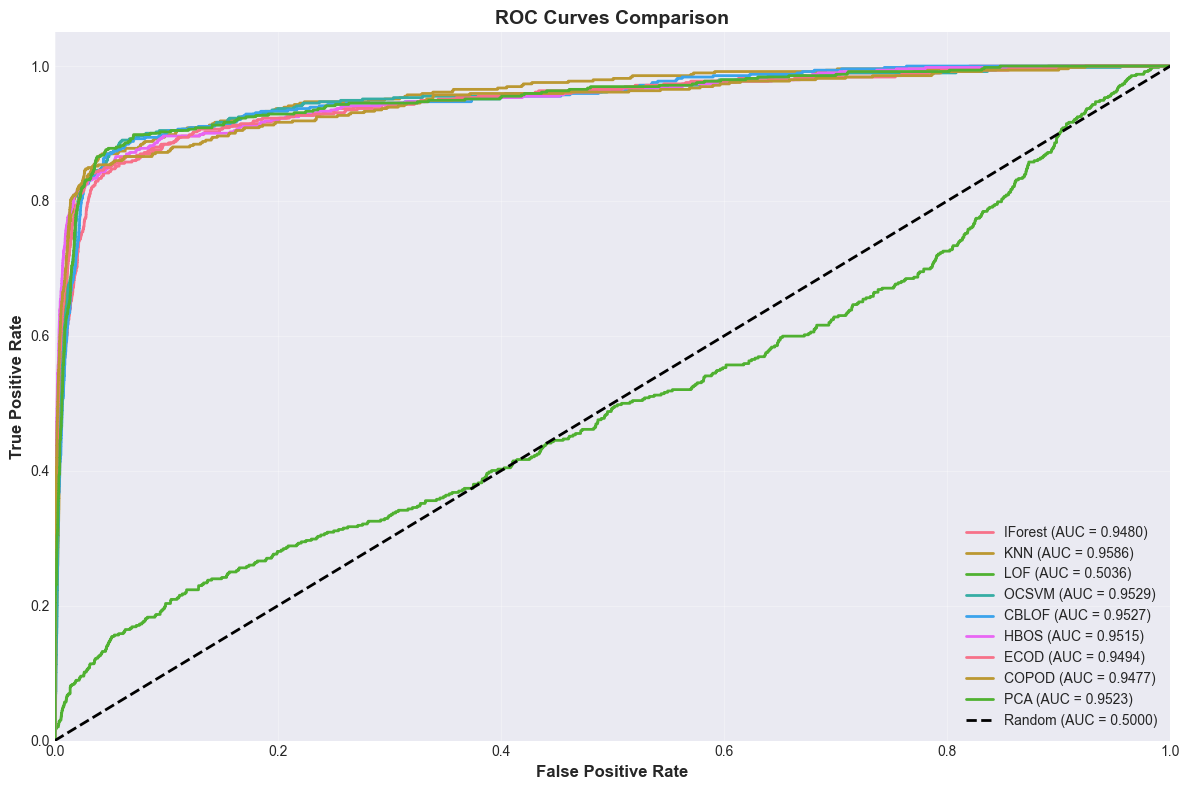

In [50]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(12, 8))

for name, score in scores.items():
    fpr, tpr, _ = roc_curve(y, score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, linewidth=2, 
           label=f'{name} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5000)')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
ax.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Визуализация с t-SNE и UMAP

### 6.1 t-SNE визуализация

In [51]:
from sklearn.manifold import TSNE

# Используем подмножество для ускорения (включая все fraud случаи)
n_samples = 20000
fraud_indices = np.where(y == 1)[0]
normal_indices = np.where(y == 0)[0]

# Все fraud + случайные normal
selected_normal = np.random.choice(normal_indices, 
                                   size=min(n_samples - len(fraud_indices), len(normal_indices)),
                                   replace=False)
selected_indices = np.concatenate([fraud_indices, selected_normal])
np.random.shuffle(selected_indices)

X_sample = X[selected_indices]
y_sample = y[selected_indices]

print(f'Sample size: {len(X_sample)}')
print(f'Frauds in sample: {y_sample.sum()}')
print(f'Normal in sample: {len(y_sample) - y_sample.sum()}')

Sample size: 20000
Frauds in sample: 492
Normal in sample: 19508


In [53]:
# t-SNE
print('Computing t-SNE... (это может занять несколько минут)')
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000,
    verbose=1,
)
X_tsne = tsne.fit_transform(X_sample)
print('t-SNE завершен!')

Computing t-SNE... (это может занять несколько минут)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.001s...
[t-SNE] Computed neighbors for 20000 samples in 0.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20

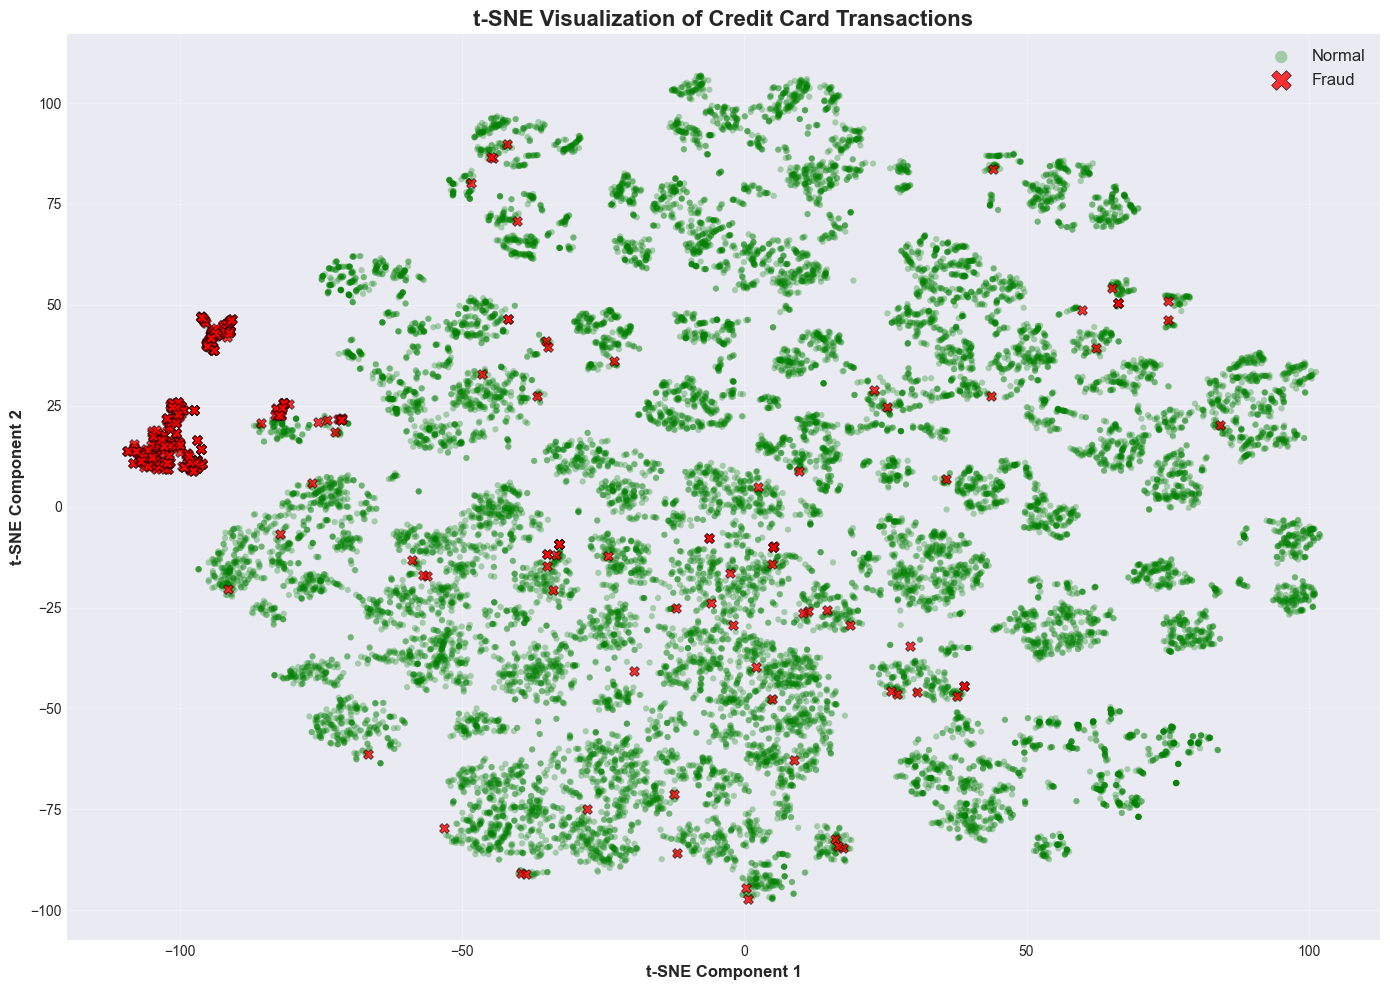


Визуализация показывает 492 мошеннических транзакций (красные X)
и 19508 нормальных транзакций (зеленые точки)


In [57]:
# Визуализация t-SNE
fig, ax = plt.subplots(figsize=(14, 10))

# Plot normal transactions
normal_mask = y_sample == 0
fraud_mask = y_sample == 1

scatter1 = ax.scatter(X_tsne[normal_mask, 0], X_tsne[normal_mask, 1],
                     c='green', alpha=0.3, s=20, label='Normal', edgecolors='none')

scatter2 = ax.scatter(X_tsne[fraud_mask, 0], X_tsne[fraud_mask, 1],
                     c='red', alpha=0.8, s=50, label='Fraud', 
                     edgecolors='black', linewidths=0.5, marker='X')

ax.set_title('t-SNE Visualization of Credit Card Transactions', 
            fontsize=16, fontweight='bold')
ax.set_xlabel('t-SNE Component 1', fontweight='bold', fontsize=12)
ax.set_ylabel('t-SNE Component 2', fontweight='bold', fontsize=12)
ax.legend(fontsize=12, markerscale=2)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f'\nВизуализация показывает {fraud_mask.sum()} мошеннических транзакций (красные X)')
print(f'и {normal_mask.sum()} нормальных транзакций (зеленые точки)')

### 6.2 UMAP визуализация

In [58]:
import umap

In [59]:
# UMAP
print('Computing UMAP...')
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = reducer.fit_transform(X_sample)
print('UMAP завершен!')

Computing UMAP...
UMAP завершен!


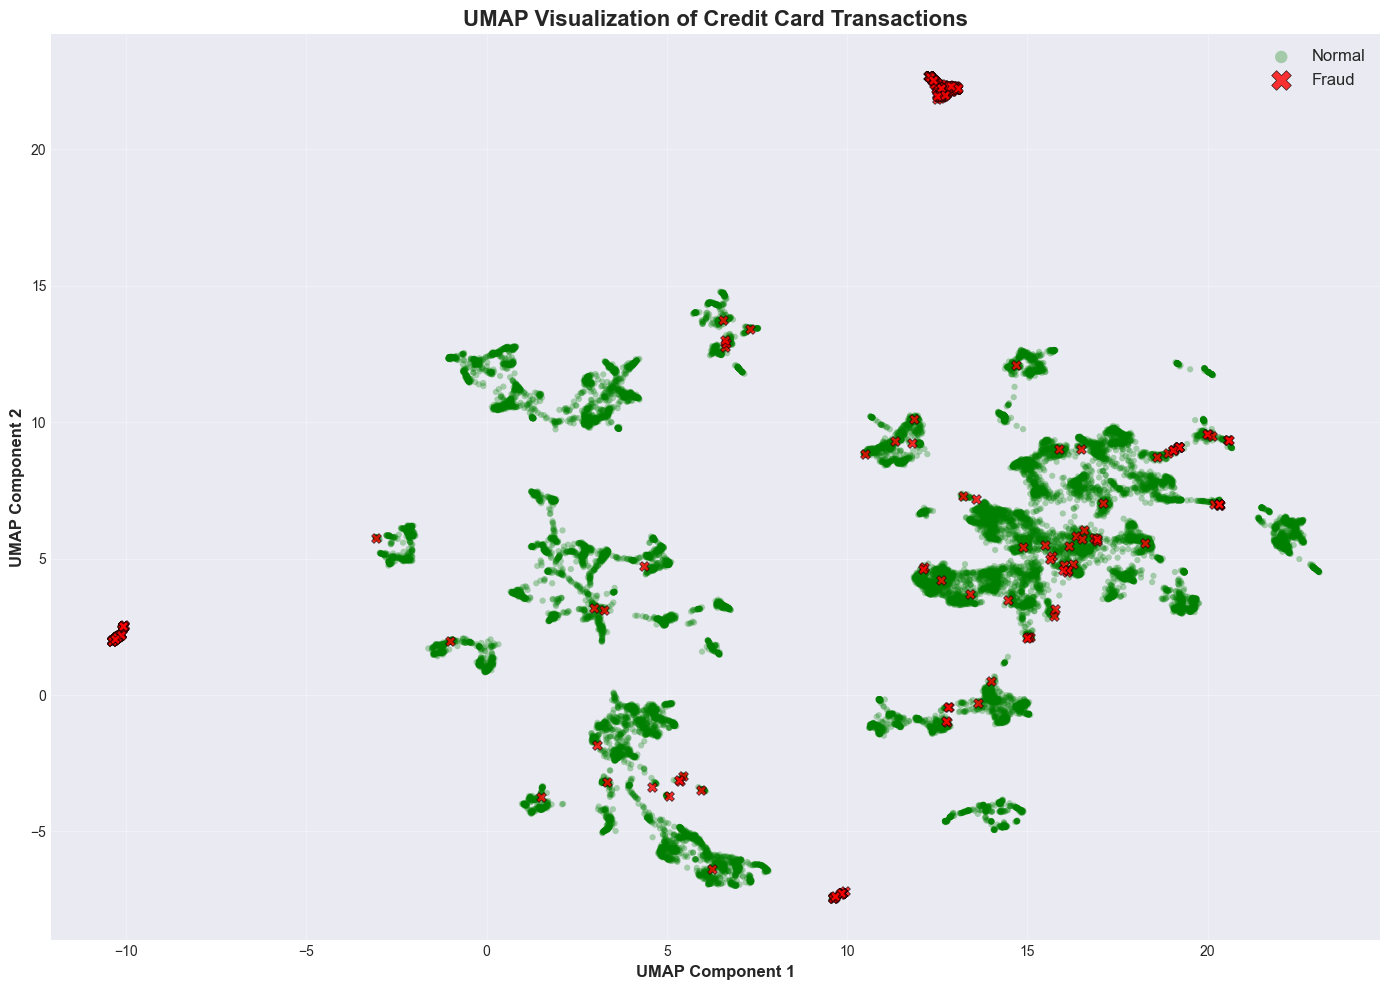

In [61]:
# Визуализация UMAP
fig, ax = plt.subplots(figsize=(14, 10))

scatter1 = ax.scatter(X_umap[normal_mask, 0], X_umap[normal_mask, 1],
                     c='green', alpha=0.3, s=20, label='Normal', edgecolors='none')

scatter2 = ax.scatter(X_umap[fraud_mask, 0], X_umap[fraud_mask, 1],
                     c='red', alpha=0.8, s=50, label='Fraud',
                     edgecolors='black', linewidths=0.5, marker='X')

ax.set_title('UMAP Visualization of Credit Card Transactions',
            fontsize=16, fontweight='bold')
ax.set_xlabel('UMAP Component 1', fontweight='bold', fontsize=12)
ax.set_ylabel('UMAP Component 2', fontweight='bold', fontsize=12)
ax.legend(fontsize=12, markerscale=2)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Сравнение t-SNE и UMAP

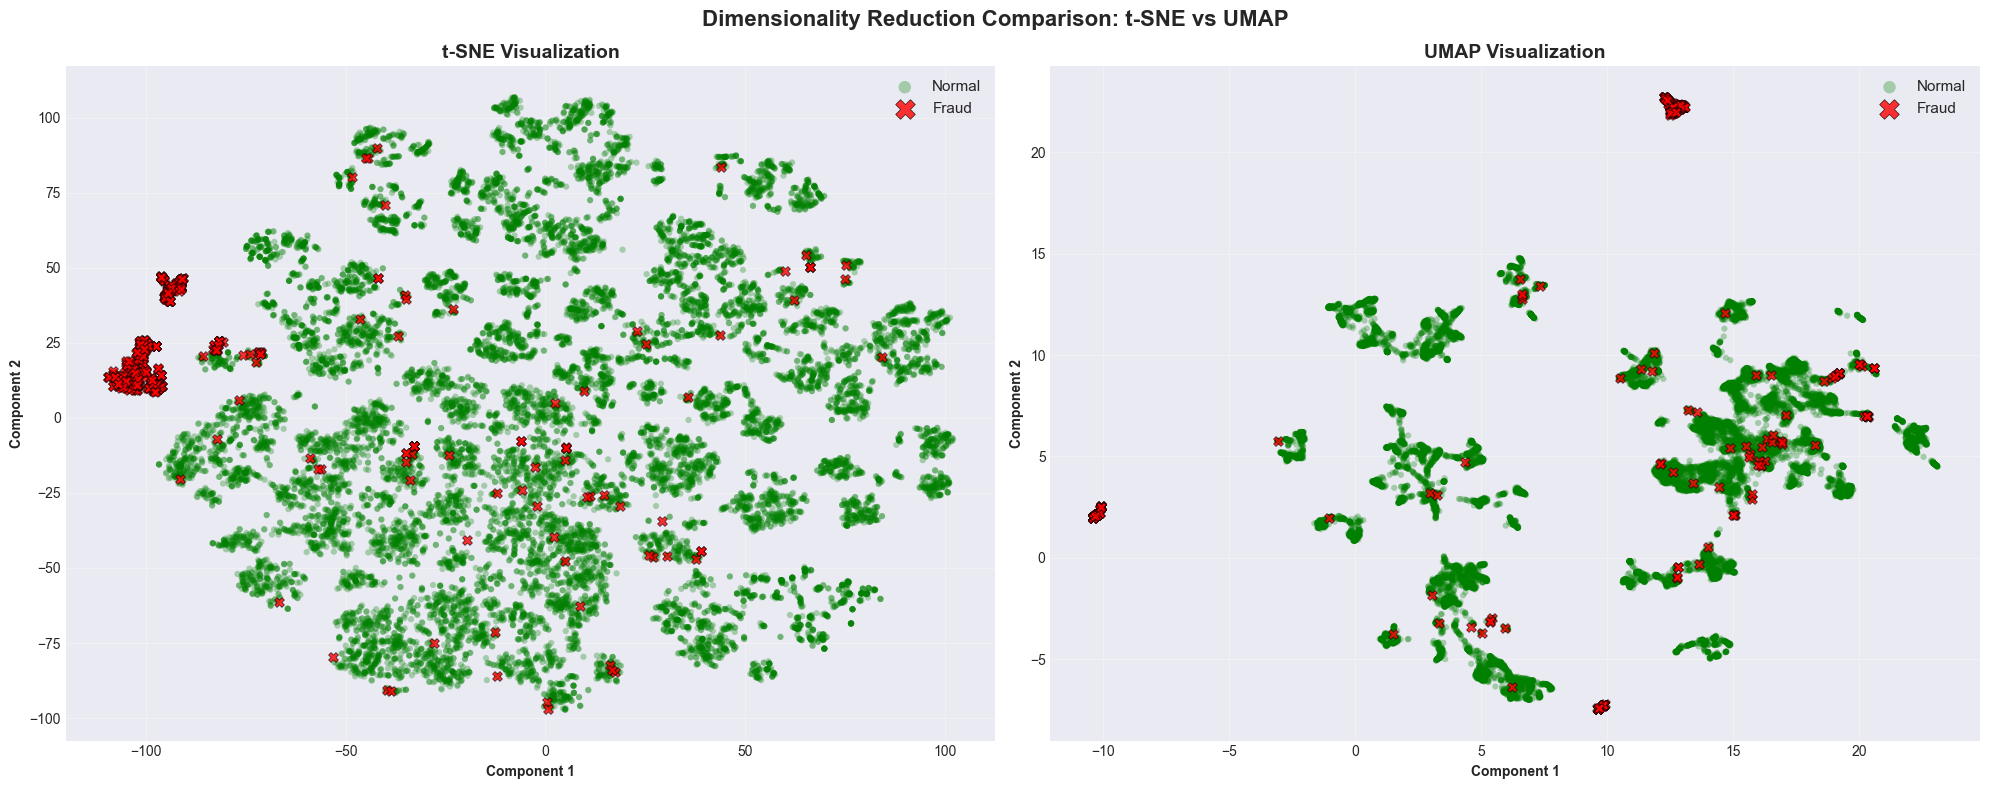

In [62]:
# Сравнение t-SNE и UMAP side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# t-SNE
axes[0].scatter(X_tsne[normal_mask, 0], X_tsne[normal_mask, 1],
               c='green', alpha=0.3, s=20, label='Normal', edgecolors='none')
axes[0].scatter(X_tsne[fraud_mask, 0], X_tsne[fraud_mask, 1],
               c='red', alpha=0.8, s=50, label='Fraud',
               edgecolors='black', linewidths=0.5, marker='X')
axes[0].set_title('t-SNE Visualization', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Component 1', fontweight='bold')
axes[0].set_ylabel('Component 2', fontweight='bold')
axes[0].legend(fontsize=11, markerscale=2)
axes[0].grid(alpha=0.3)

# UMAP
axes[1].scatter(X_umap[normal_mask, 0], X_umap[normal_mask, 1],
               c='green', alpha=0.3, s=20, label='Normal', edgecolors='none')
axes[1].scatter(X_umap[fraud_mask, 0], X_umap[fraud_mask, 1],
               c='red', alpha=0.8, s=50, label='Fraud',
               edgecolors='black', linewidths=0.5, marker='X')
axes[1].set_title('UMAP Visualization', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Component 1', fontweight='bold')
axes[1].set_ylabel('Component 2', fontweight='bold')
axes[1].legend(fontsize=11, markerscale=2)
axes[1].grid(alpha=0.3)

plt.suptitle('Dimensionality Reduction Comparison: t-SNE vs UMAP',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

На сравнительной картинке t‑SNE и UMAP видно:

- t‑SNE даёт более «равномерно» рассыпанное облако: Fraud‑точки появляются и компактными островами, и вперемешку с Normal. Это хорошо показывает локальные различия, но глобальная структура пространства менее явная.
- UMAP сильнее группирует Normal в вытянутые «ветки», а Fraud либо образует отдельные компактные кластеры, либо лежит на периферии этих веток.

Дальнейшее исследование:

- Для визуального анализа и feature engineering UMAP даёт более интерпретируемое разделение кластеров.  
- Имеет смысл попробовать обучить хотя бы HBOS/ECOD/COPOD на UMAP‑координатах (2–5 компонент) и сравнить F1/ROC‑AUC с версиями на исходных фичах.

### 6.4 Обучение HBOS/ECOD/COPOD на UMAP‑координатах

In [ ]:
import umap
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

from pyod.models.hbos import HBOS
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# UMAP-преобразование
reducer = umap.UMAP(
    n_components=4,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42,
)
X_train_umap = reducer.fit_transform(X_train)
X_test_umap = reducer.transform(X_test)

# Модели на исходных фичах
base_models = {
    'HBOS_raw': HBOS(contamination=contamination),
    'ECOD_raw': ECOD(contamination=contamination),
    'COPOD_raw': COPOD(contamination=contamination),
}

# Модели на UMAP-фичах
umap_models = {
    'HBOS_umap': HBOS(contamination=contamination),
    'ECOD_umap': ECOD(contamination=contamination),
    'COPOD_umap': COPOD(contamination=contamination),
}

results = {}

# обучение и оценка на X
for name, model in base_models.items():
    model.fit(X_train)
    y_score = model.decision_function(X_test)
    y_pred = model.predict(X_test)

    results[name] = {
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_score),
    }

# обучение и оценка на UMAP(X)
for name, model in umap_models.items():
    model.fit(X_train_umap)
    y_score = model.decision_function(X_test_umap)
    y_pred = model.predict(X_test_umap)

    results[name] = {
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_score),
    }

import pandas as pd
df = pd.DataFrame(results).T
print(df)

                F1  ROC-AUC
HBOS_raw    0.3333   0.9346
ECOD_raw    0.2898   0.9443
COPOD_raw   0.3381   0.9443
HBOS_umap   0.0000   0.8192
ECOD_umap   0.1898   0.8276
COPOD_umap  0.0000   0.7714


Вывод: в текущей конфигурации UMAP как замена исходным фичам не подходит

### 6.5 Анализ расстояний между классами

Анализ расстояний между мошенническими и нормальными транзакциями

t-SNE:
  Среднее расстояние: 110.982
  Минимальное расстояние: 0.014
  Максимальное расстояние: 213.727

UMAP:
  Среднее расстояние: 17.687
  Минимальное расстояние: 0.001
  Максимальное расстояние: 33.604


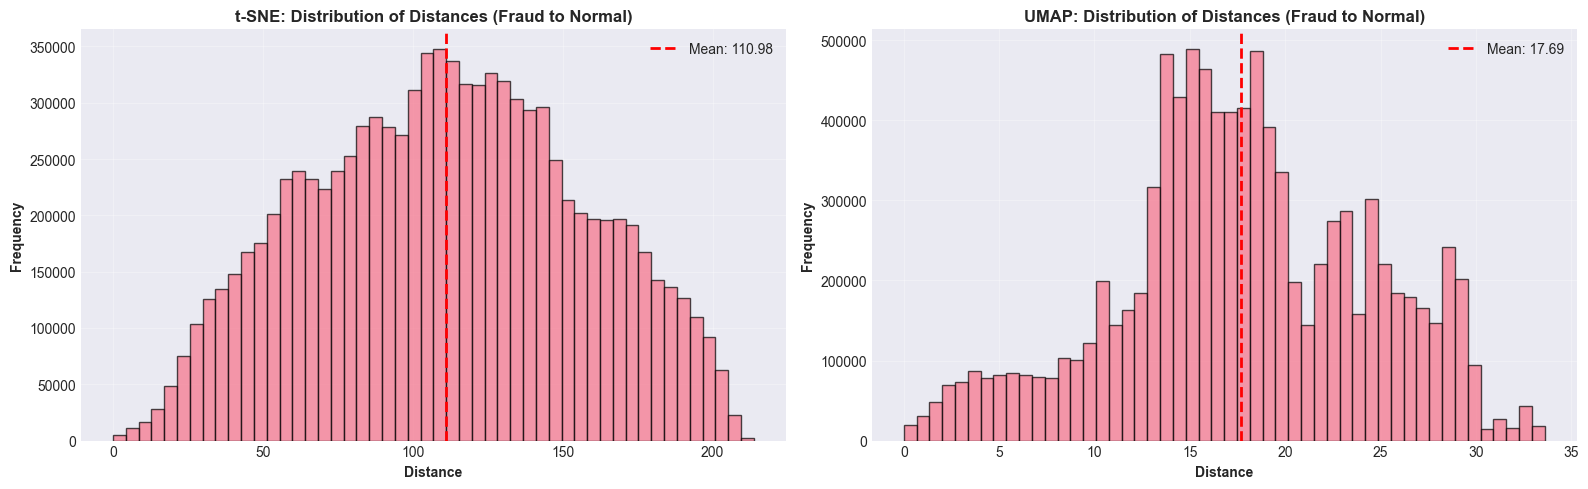

In [64]:
from scipy.spatial.distance import cdist

# Анализ расстояний для t-SNE
if fraud_mask.sum() > 0:
    # Расстояния между fraud и normal точками
    distances_tsne = cdist(X_tsne[fraud_mask], X_tsne[normal_mask])
    mean_distance_tsne = distances_tsne.mean()
    min_distance_tsne = distances_tsne.min()
    max_distance_tsne = distances_tsne.max()
    
    # Расстояния для UMAP
    distances_umap = cdist(X_umap[fraud_mask], X_umap[normal_mask])
    mean_distance_umap = distances_umap.mean()
    min_distance_umap = distances_umap.min()
    max_distance_umap = distances_umap.max()
    
    print('Анализ расстояний между мошенническими и нормальными транзакциями\n')
    print('t-SNE:')
    print(f'  Среднее расстояние: {mean_distance_tsne:.3f}')
    print(f'  Минимальное расстояние: {min_distance_tsne:.3f}')
    print(f'  Максимальное расстояние: {max_distance_tsne:.3f}')
    
    print('\nUMAP:')
    print(f'  Среднее расстояние: {mean_distance_umap:.3f}')
    print(f'  Минимальное расстояние: {min_distance_umap:.3f}')
    print(f'  Максимальное расстояние: {max_distance_umap:.3f}')
    
    # Визуализация распределения расстояний
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    axes[0].hist(distances_tsne.flatten(), bins=50, edgecolor='black', alpha=0.7)
    axes[0].axvline(mean_distance_tsne, color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {mean_distance_tsne:.2f}')
    axes[0].set_xlabel('Distance', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    axes[0].set_title('t-SNE: Distribution of Distances (Fraud to Normal)', 
                     fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].hist(distances_umap.flatten(), bins=50, edgecolor='black', alpha=0.7)
    axes[1].axvline(mean_distance_umap, color='red', linestyle='--',
                   linewidth=2, label=f'Mean: {mean_distance_umap:.2f}')
    axes[1].set_xlabel('Distance', fontweight='bold')
    axes[1].set_ylabel('Frequency', fontweight='bold')
    axes[1].set_title('UMAP: Distribution of Distances (Fraud to Normal)',
                     fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Разная шкала t‑SNE и UMAP означает, что сравнивать сами числа нельзя, но вывод по форме распределений такой:

И там, и там часть мошеннических транзакций лежит далеко от ближайших нормальных (большие расстояния в хвосте), то есть есть «явные» аномалии, которые детекторы ловят легко.

Минимальные расстояния почти нулевые (0.014 и 0.001) — есть Fraud, которые в эмбеддинге практически совпадают с нормальными точками, поэтому никакой метод, основанный только на текущих признаках, не сможет надёжно их отделить.

### 6.6 Ансамбль по скору из лучших и быстрых моделей: HBOS, COPOD, ECOD, IForest, CBLOF, PCA

In [102]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    f1_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
)
import pandas as pd

stack_models = ['HBOS', 'COPOD', 'ECOD', 'IForest', 'CBLOF', 'PCA']

X_stack = np.column_stack([scores[m] for m in stack_models])

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_stack, y, test_size=0.7, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s_sc = scaler.fit_transform(X_train_s)
X_test_s_sc = scaler.transform(X_test_s)

# Обучаем мета‑модель
meta = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
)

meta.fit(X_train_s_sc, y_train_s)

y_score_meta = meta.predict_proba(X_test_s_sc)[:, 1]
y_pred_meta = (y_score_meta > 0.9).astype(int)  # порог можно тюнить

print('Classification report (Stacking_LR):')
print(classification_report(y_test_s, y_pred_meta, digits=4))

# Метрики стэкинга
stack_metrics = {
    'Accuracy':  accuracy_score(y_test_s, y_pred_meta),
    'Precision': precision_score(y_test_s, y_pred_meta, zero_division=0),
    'Recall':    recall_score(y_test_s, y_pred_meta, zero_division=0),
    'F1-Score':  f1_score(y_test_s, y_pred_meta),
    'ROC-AUC':   roc_auc_score(y_test_s, y_score_meta),
}

print('\nStacking metrics:')
for k, v in stack_metrics.items():
    print(f'{k}: {v:.4f}')

Classification report (Stacking_LR):
              precision    recall  f1-score   support

           0     0.9996    0.9911    0.9953    199021
           1     0.1282    0.7529    0.2190       344

    accuracy                         0.9907    199365
   macro avg     0.5639    0.8720    0.6072    199365
weighted avg     0.9981    0.9907    0.9940    199365


Stacking metrics:
Accuracy: 0.9907
Precision: 0.1282
Recall: 0.7529
F1-Score: 0.2190
ROC-AUC: 0.9514


## 7. Выводы

Из базовых моделей лучше всего себя показали HBOS, COPOD, ECOD, IForest, дополнительно полезны CBLOF и PCA; KNN, OCSVM и особенно LOF по соотношению качество/время нецелесообразно использовать.

На исходных PCA‑фичах эти модели дают F1 порядка 0.33–0.35 и ROC‑AUC ≈ 0.95 при времени обучения от долей секунды до нескольких секунд, что уже близко к верхней границе качества для данного набора признаков.

Обучение тяжёлых моделей на подвыборке (train_size≈0.1–0.2) и последующее predict на всём X сильно ускоряет пайплайн при минимальной потере качества; для быстрых моделей (HBOS/ECOD/COPOD/IForest/PCA) имеет смысл учиться на всей выборке.

UMAP/t‑SNE полезны для визуализации: они показывают, что часть Fraud образует хорошо отделимые кластеры, а часть почти полностью смешана с Normal, поэтому F1 принципиально не может стать близким к 1 без новых фич; при этом обучение моделей напрямую на UMAP‑фичах качество ухудшает, так что UMAP стоит использовать только для анализа, а не как основное пространство признаков.

Ансамбли: простое усреднение нормированных скорингов даёт небольшой прирост устойчивости; 31–0.32 с precision/recall сопоставимы с лучшими одиночными моделями, дальнейший рост качества требует уже улучшения данных и признаков, а не более сложных ансамблей.